<a href="https://colab.research.google.com/github/adeyeyealex/JUPYTER-NOTEBOOK-TUTORIAL-EXERCISE/blob/main/Fruit_360_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend, models, layers, regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, backend
from tensorflow.keras.layers import TextVectorization, IntegerLookup, Bidirectional, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import string
import re
np.random.seed(1)
import os
import shutil

In [21]:
from tensorflow.keras.utils import plot_model

In [3]:
from PIL import Image # Library to help view images
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
from tensorflow.keras import optimizers

In [4]:
# Download and innsall Kaggle package
! pip install kaggle -q

In [22]:
# To remove directory

# ! rm -r ~/.kaggle 

rm: cannot remove '/root/.kaggle': Is a directory


In [6]:
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"alexfadeyeye","key":"20a87fe0f0a519ac3e7bd32e62f9a8a5"}'}

In [7]:
# Make a Kaggle dirrectory
! mkdir ~/.kaggle

In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
# Change permission of the the ,json file.
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
# Download the dataset
! kaggle datasets download -d moltean/fruits

 99% 1.28G/1.28G [00:09<00:00, 190MB/s]
100% 1.28G/1.28G [00:09<00:00, 140MB/s]


In [12]:
! unzip "/content/fruits.zip"

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [15]:
train_dir = '/content/fruits-360-original-size/fruits-360-original-size/Training'
valid_dir = '/content/fruits-360-original-size/fruits-360-original-size/Validation'
test_dir = '/content/fruits-360-original-size/fruits-360-original-size/Test'

In [16]:
# We need to normalize the pixels in the images.  The data will 'flow' through this generator.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_apple_6_dir = os.path.join(train_dir, 'apple_6')

In [114]:
datagen = ImageDataGenerator( # The image augmentaion function in Keras
    rotation_range=40, # Rotate the images randomly by 40 degrees
    width_shift_range=0.2, # Shift the image horizontally by 20%
    height_shift_range=0.2, # Shift the image veritcally by 20%
    shear_range=0.2, # Shear image by 20%
    zoom_range=0.2, # Zoom in on image by 20%
    horizontal_flip=True, # Flip image horizontally 
    fill_mode='nearest') # How to fill missing pixels after a augmentaion opperation

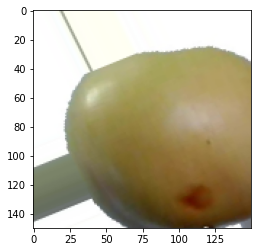

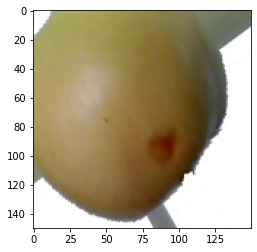

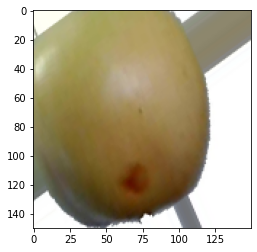

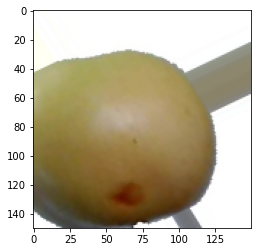

In [115]:
# Lets see the image augmentaion
from tensorflow.keras.preprocessing import image
img = image.load_img(os.path.join(train_apple_6_dir, os.listdir(train_apple_6_dir)[1]), target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0 
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [116]:
# Since the file images are in a directory we need to move them from the directory into the model.  
# Keras as a function that makes this easy. Documentaion is here: https://keras.io/preprocessing/image/

train_generator = train_datagen.flow_from_directory(
    train_dir, # The directory where the train data is located
    target_size=(150, 150), # Reshape the image to 150 by 150 pixels. This is important because it makes sure all images are the same size.
    batch_size=20, # We will take images in batches of 20.
    shuffle=False,
    class_mode='categorical') # The classification is binary.

validation_generator = train_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=False,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=False,
    class_mode='categorical')

Found 6231 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


In [117]:
# Build a model
def Base_CNN():
  backend.clear_session()
  model = models.Sequential()

  model.add(layers.Conv2D(32, (3,3), activation = 'relu', padding='same', input_shape = (150, 150, 3)))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())

  model.add(keras.layers.Dense(32, activation='relu'))
  model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())

  model.add(keras.layers.Dense(32, activation='relu'))
  model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())

  model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.3))

  model.add(layers.Dense(24, activation='softmax'))

  model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  return model

In [118]:
model = Base_CNN()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 75, 75, 32)        1056      
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0

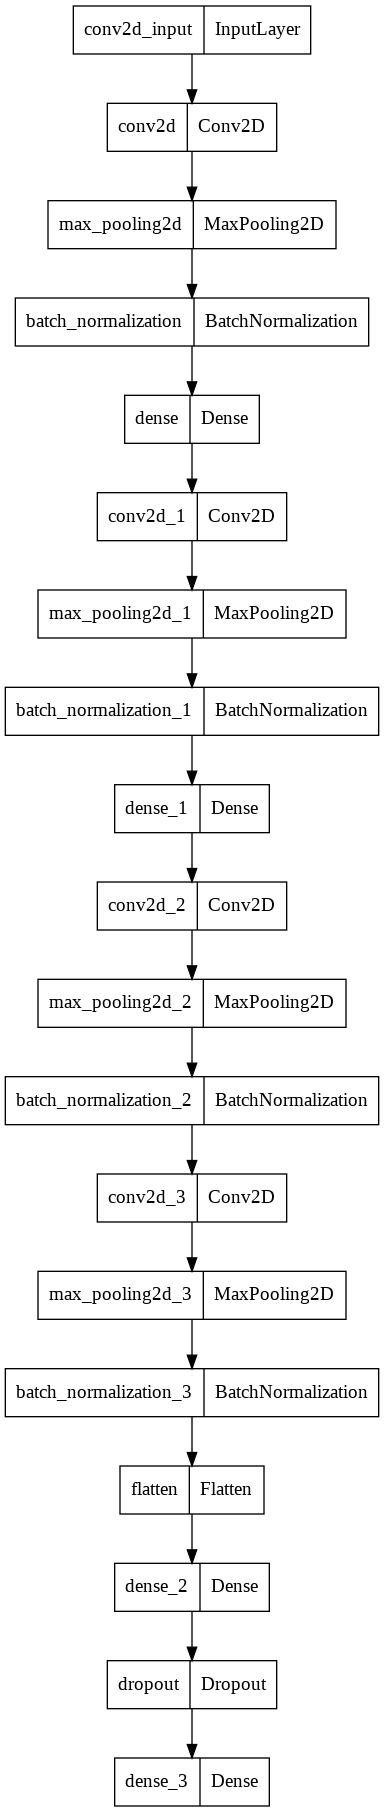

In [119]:
plot_model(model)

In [122]:
history = model.fit(train_generator, 
          epochs = 100, 
          batch_size = 20,  
          validation_data=validation_generator,
          verbose = 2,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

Epoch 1/100
312/312 - 37s - loss: 0.2689 - accuracy: 0.9034 - val_loss: 3.6444 - val_accuracy: 0.5536 - 37s/epoch - 119ms/step
Epoch 2/100
312/312 - 37s - loss: 0.4477 - accuracy: 0.8697 - val_loss: 2.5932 - val_accuracy: 0.6024 - 37s/epoch - 118ms/step
Epoch 3/100
312/312 - 37s - loss: 0.3218 - accuracy: 0.8920 - val_loss: 4.1233 - val_accuracy: 0.5864 - 37s/epoch - 120ms/step
Epoch 4/100
312/312 - 38s - loss: 0.1780 - accuracy: 0.9377 - val_loss: 1.7627 - val_accuracy: 0.6757 - 38s/epoch - 121ms/step
Epoch 5/100
312/312 - 36s - loss: 0.1131 - accuracy: 0.9596 - val_loss: 2.5787 - val_accuracy: 0.6541 - 36s/epoch - 117ms/step
Epoch 6/100
312/312 - 37s - loss: 0.1035 - accuracy: 0.9632 - val_loss: 1.1970 - val_accuracy: 0.7717 - 37s/epoch - 118ms/step
Epoch 7/100
312/312 - 37s - loss: 0.0864 - accuracy: 0.9718 - val_loss: 2.5589 - val_accuracy: 0.6638 - 37s/epoch - 117ms/step
Epoch 8/100
312/312 - 37s - loss: 0.2160 - accuracy: 0.9292 - val_loss: 4.4529 - val_accuracy: 0.6252 - 37s/epo

In [126]:
# Build a plotting function
def plot_history():
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  return plt.show()

test_loss, test_acc =model.evaluate(test_generator, steps = 30) # Test images are in a dirrectory so they must flow from dirrectory. 
                                                                           # 50 steps * 20 batch size in test generator = 1000 test images per epoch
print('test_acc:', test_acc)

model.save('fruits-360.h5')

30/30 [==============================] - 2s 71ms/step - loss: 1.2871 - accuracy: 0.7083
test_acc: 0.7083333134651184
